<a href="https://colab.research.google.com/github/Pramurta/Neural-Nets-Assignment-2/blob/main/NN_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 and image augmentation has also been used to reduce variance in our training
train_datagen = ImageDataGenerator(
      rescale=1./255,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=[0.4,1.5],
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 140 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical')

# Flow validation images in batches of 30 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'val',  # This is the source directory for validation images
        target_size=(150, 150),  
        batch_size=64,
        class_mode='categorical')



Found 20000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D , Dropout
from keras import regularizers

tf.keras.backend.clear_session()

def define_model_vgg16_improvement(image_shape,total_classes):
  print(image_shape[2])

  model = Sequential()
  weight_decay = 0.0005
  learning_rate = 0.1
  lr_decay = 1e-6
  lr_drop = 20
  
  model.add(Conv2D(64, (3, 3), padding='same',input_shape=image_shape,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))


  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  
  return model


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model_vgg16(model , train_generator,validation_generator,epochs=10,batch_size=128):
  
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_vgg16_batch_64', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.9, patience = 3, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 40)
  ]
  history=model.fit(train_generator, epochs = epochs, batch_size = batch_size,callbacks = callbacks, verbose = 1,validation_data = validation_generator)
  return history

In [ ]:
improved_model = define_model_vgg16_improvement((150, 150 , 3),10)
history = train_model_vgg16(improved_model , train_generator , validation_generator , epochs=250)

3
Epoch 1/250
313/313 [==============================] - ETA: 0s - loss: 58.3119 - accuracy: 0.1575
Epoch 00001: val_accuracy improved from -inf to 0.10420, saving model to best_model_vgg16_batch_64
INFO:tensorflow:Assets written to: best_model_vgg16_batch_64/assets
313/313 [==============================] - 102s 326ms/step - loss: 58.3119 - accuracy: 0.1575 - val_loss: 44.5721 - val_accuracy: 0.1042 - lr: 0.1000
Epoch 2/250
313/313 [==============================] - ETA: 0s - loss: 33.5378 - accuracy: 0.2241
Epoch 00002: val_accuracy improved from 0.10420 to 0.14080, saving model to best_model_vgg16_batch_64
INFO:tensorflow:Assets written to: best_model_vgg16_batch_64/assets
313/313 [==============================] - 103s 328ms/step - loss: 33.5378 - accuracy: 0.2241 - val_loss: 24.9946 - val_accuracy: 0.1408 - lr: 0.1000
Epoch 3/250
313/313 [==============================] - ETA: 0s - loss: 18.8117 - accuracy: 0.2733
Epoch 00003: val_accuracy did not improve from 0.14080
313/313 [===

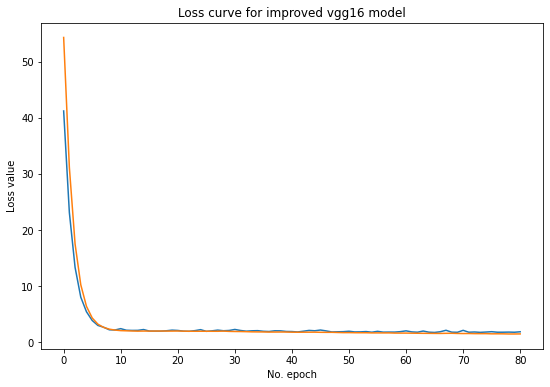

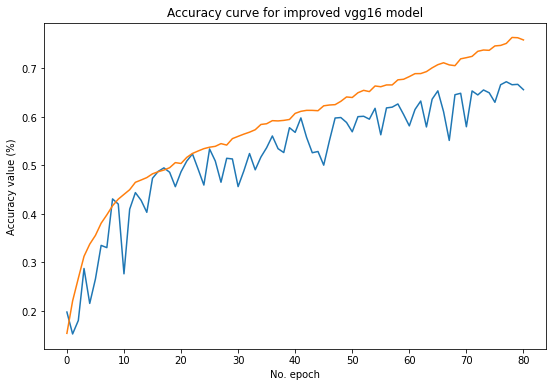

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.plot(history.history['val_loss'],label='Test loss')
plt.plot(history.history['loss'],label='Train loss')
plt.title('Loss curve for improved vgg16 model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (9,6))
plt.plot(history.history['val_accuracy'],label = 'Test accuracy')
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.title('Accuracy curve for improved vgg16 model')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

